# Importing Essential Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [2]:
df = pd.read_csv('computersell.csv')
df

,Age,Income,Student,Credit_Rating,Buys_Computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


# Defining Supervisor

In [3]:
y = df["Buys_Computer"]
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Buys_Computer, dtype: object

# Redefining Dataset

In [4]:
df = df.drop(['Buys_Computer'], axis=1)
df

,Age,Income,Student,Credit_Rating
0,<=30,high,no,fair
1,<=30,high,no,excellent
2,31-40,high,no,fair
3,>40,medium,no,fair
4,>40,low,yes,fair
5,>40,low,yes,excellent
6,31-40,low,yes,excellent
7,<=30,medium,no,fair
8,<=30,low,yes,fair
9,>40,medium,yes,fair


In [5]:
X = df
X

,Age,Income,Student,Credit_Rating
0,<=30,high,no,fair
1,<=30,high,no,excellent
2,31-40,high,no,fair
3,>40,medium,no,fair
4,>40,low,yes,fair
5,>40,low,yes,excellent
6,31-40,low,yes,excellent
7,<=30,medium,no,fair
8,<=30,low,yes,fair
9,>40,medium,yes,fair


# Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [7]:
X = X.apply(LabelEncoder().fit_transform)
X

,Age,Income,Student,Credit_Rating
0,1,0,0,1
1,1,0,0,0
2,0,0,0,1
3,2,2,0,1
4,2,1,1,1
5,2,1,1,0
6,0,1,1,0
7,1,2,0,1
8,1,1,1,1
9,2,2,1,1


# Defining Training and Testing Data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

print ( X_train )
print ( X_test )
print ( y_train )
print ( y_test )

    Age  Income  Student  Credit_Rating
6     0       1        1              0
4     2       1        1              1
11    0       2        0              0
2     0       0        0              1
13    2       2        0              0
9     2       2        1              1
1     1       0        0              0
7     1       2        0              1
10    1       2        1              0
3     2       2        0              1
0     1       0        0              1
5     2       1        1              0
12    0       0        1              1
   Age  Income  Student  Credit_Rating
8    1       1        1              1
[1 1 1 1 0 1 0 0 1 1 0 0 1]
[1]


# Data Normalisation

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)
print(X_test)

[[-1.29986737 -0.17817416  1.08012345 -1.08012345]
 [ 1.11417203 -0.17817416  1.08012345  0.9258201 ]
 [-1.29986737  0.97995789 -0.9258201  -1.08012345]
 [-1.29986737 -1.33630621 -0.9258201   0.9258201 ]
 [ 1.11417203  0.97995789 -0.9258201  -1.08012345]
 [ 1.11417203  0.97995789  1.08012345  0.9258201 ]
 [-0.09284767 -1.33630621 -0.9258201  -1.08012345]
 [-0.09284767  0.97995789 -0.9258201   0.9258201 ]
 [-0.09284767  0.97995789  1.08012345 -1.08012345]
 [ 1.11417203  0.97995789 -0.9258201   0.9258201 ]
 [-0.09284767 -1.33630621 -0.9258201   0.9258201 ]
 [ 1.11417203 -0.17817416  1.08012345 -1.08012345]
 [-1.29986737 -1.33630621  1.08012345  0.9258201 ]]
[[-0.09284767 -0.17817416  1.08012345  0.9258201 ]]


# Training Model

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# Prediction

In [11]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]]


# Confusion Matrix and Accuracy Metrics

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy is : ",  accuracy_score(y_test, y_pred))
print("Precision is : ", precision_score(y_test, y_pred))
print("Recall Score is : ", recall_score(y_test, y_pred))

[[1]]
Accuracy is :  1.0
Precision is :  1.0
Recall Score is :  1.0


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=100)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Graph

In [16]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

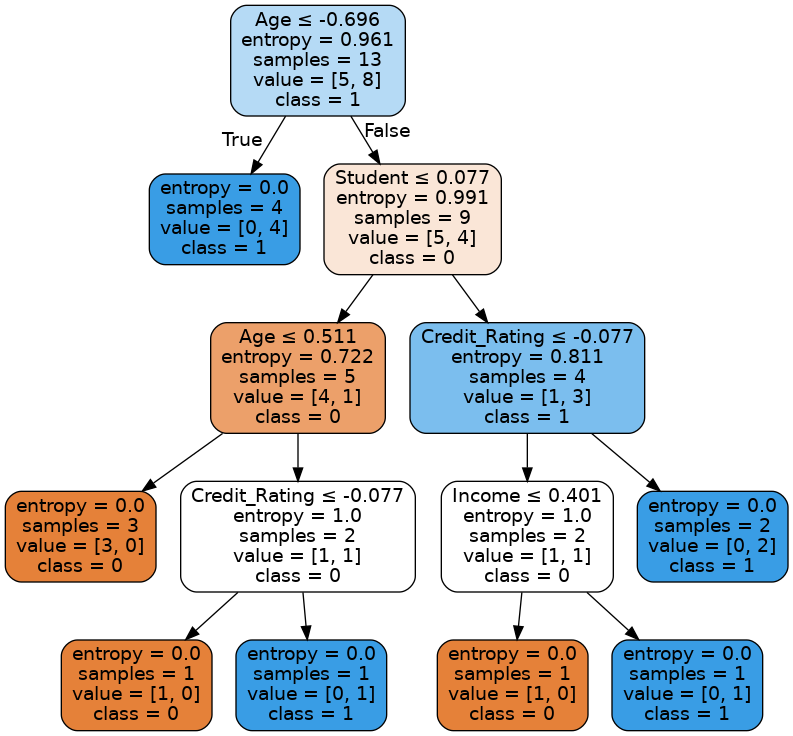

In [17]:
feature_cols = ['Age', 'Income', 'Student', 'Credit_Rating']

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Computer.png')
Image(graph.create_png())